# Olcademy Artificial Neural Network Task:-

Task C:

Group your audience based on powerful filters such as demographics, channels, behaviours, traffic source to see how different groups engage with your business.


@author:--Ravi Gupta

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating Dataset

In [325]:
d = {}
n=1000

d['cities'] = ['bokaro','bokaro','mumbai','bokaro','bhopal','banglore','indore','indore','banglore','indore']*n
d['gender'] = ['male','female','male','male','female','male','male','female','male','female']*n
d['age'] = ['15-21','21-35','35-50','50-60','21_35','21_35','21_35','15-21','15-21','21-35']*n
d['behaviours'] = ['Caution','Logical','Organized','Precise',"Careless",'Logical','Logical','Caution','Logical','Precise']*n
d['channels'] = ['OMP','WS','AS','OS','VAR','OMS','VAR','VAR','VAR','OMS']*n
d['traffic_sources'] = ['DT','Ref','SE','NA','ST','ST','ST','ST','NA','NA']*n


keys = list(d.keys())
for key in keys:
    np.random.shuffle(d[key])
    
df = pd.DataFrame(d)  #--converting to dataframe
print(df.shape)
df.head()

(10000, 6)


,cities,gender,age,behaviours,channels,traffic_sources
0,mumbai,female,21_35,Logical,WS,NA
1,indore,male,21-35,Precise,VAR,DT
2,bokaro,male,21-35,Caution,VAR,ST
3,bhopal,male,21-35,Careless,AS,ST
4,banglore,male,50-60,Precise,WS,Ref


In [326]:
df.describe()

,cities,gender,age,behaviours,channels,traffic_sources
count,10000,10000,10000,10000,10000,10000
unique,5,2,5,5,6,5
top,bokaro,male,21_35,Logical,VAR,ST
freq,3000,6000,3000,4000,4000,4000


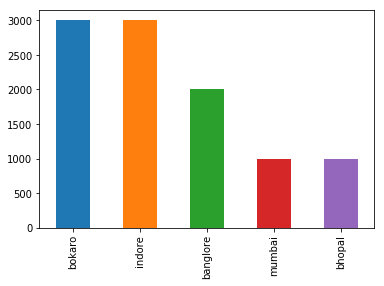

In [327]:
df.iloc[:,0].value_counts().plot.bar()

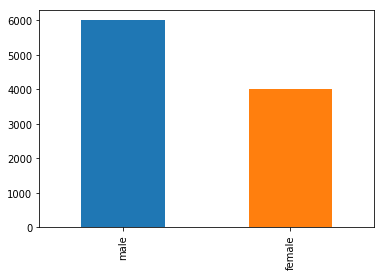

In [328]:
df.iloc[:,1].value_counts().plot.bar()

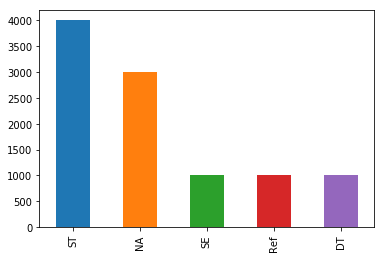

In [329]:
df.iloc[:,5].value_counts().plot.bar()

In [330]:
#--Concatenating all columns respectively with delimeter =' ' and convert it into csv file for proper access of all that values

data = np.array(df)
np.savetxt('data.csv',data,delimiter=' ',fmt='%s')

In [331]:
df_1 = pd.read_csv('data.csv')
df_1.head()

,mumbai female 21_35 Logical WS NA
0,indore male 21-35 Precise VAR DT
1,bokaro male 21-35 Caution VAR ST
2,bhopal male 21-35 Careless AS ST
3,banglore male 50-60 Precise WS Ref
4,bokaro female 50-60 Precise VAR Ref


In [332]:
df_2 = pd.DataFrame()
df_2['combined_words']=df_1.iloc[:,0]

In [333]:
df_2.head()

,combined_words
0,indore male 21-35 Precise VAR DT
1,bokaro male 21-35 Caution VAR ST
2,bhopal male 21-35 Careless AS ST
3,banglore male 50-60 Precise WS Ref
4,bokaro female 50-60 Precise VAR Ref


# Using countvectoriser to count the freq of occurence of each word

In [334]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_1.iloc[:,0])

# Using tf-idf to reduce the effect of common words

In [335]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [336]:
df_2['tf_idf'] = list(X_train_tfidf.toarray())

In [337]:
df_2.head()

,combined_words,tf_idf
0,indore male 21-35 Precise VAR DT,"[0.0, 0.28122802210146, 0.0, 0.366062913992985..."
1,bokaro male 21-35 Caution VAR ST,"[0.0, 0.3143225641432801, 0.0, 0.4091407140164..."
2,bhopal male 21-35 Careless AS ST,"[0.0, 0.24859535687328432, 0.0, 0.323586319962..."
3,banglore male 50-60 Precise WS Ref,"[0.0, 0.0, 0.0, 0.0, 0.3504859425640168, 0.443..."
4,bokaro female 50-60 Precise VAR Ref,"[0.0, 0.0, 0.0, 0.0, 0.37809322442553084, 0.47..."


# Making Model

In [338]:
from sklearn.neighbors import KDTree

kdt = KDTree(df_2['tf_idf'].tolist(),leaf_size=3)

# Model Testing 

In [339]:
n = np.random.randint(low=0,high=df_2.shape[0])  
print('index no of input value:',n)

testing_row = df_2.iloc[n,:]        #--taking any random row

dist , index = kdt.query( [testing_row[1]] , k=20)  #--finding distance of input point to another point and also note the index of that row
print('\ndistance:\n\n',dist)
print('\nindex of value which is similar to input value:\n\n',index)

index no of input value: 142

distance:

 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.41926183 0.41926183 0.54164519
  0.54164519 0.54164519 0.54164519 0.54164519 0.54164519 0.54164519
  0.54164519 0.54164519]]

index of value which is similar to input value:

 [[ 142 2184 1394 6607 2002 4699 4612 4416 7859 6564  289 9085 7318 4349
  2596 6060 3798 6372 1842 5566]]


# Input_Testing_Value

In [340]:
Input_Value = testing_row[0]
Input_Value

'bokaro male 15-21 Logical VAR SE'

# Predicted_Output_Cluster_Points

In [341]:
predicted_value = df_2.iloc[index[0],0]
predicted_value

142       bokaro male 15-21 Logical VAR SE
2184      bokaro male 15-21 Logical VAR SE
1394      bokaro male 15-21 Logical VAR SE
6607      bokaro male 15-21 Logical VAR SE
2002      bokaro male 15-21 Logical VAR SE
4699      bokaro male 15-21 Logical VAR SE
4612      bokaro male 15-21 Logical VAR SE
4416      bokaro male 15-21 Logical VAR SE
7859      bokaro male 15-21 Logical VAR SE
6564    bokaro female 15-21 Logical VAR SE
289     bokaro female 15-21 Logical VAR SE
9085      indore male 15-21 Logical VAR SE
7318      indore male 15-21 Logical VAR SE
4349      indore male 15-21 Logical VAR SE
2596      indore male 15-21 Logical VAR SE
6060      indore male 15-21 Logical VAR SE
3798      indore male 15-21 Logical VAR SE
6372      indore male 15-21 Logical VAR SE
1842      indore male 15-21 Logical VAR SE
5566      indore male 15-21 Logical VAR SE
Name: combined_words, dtype: object